In [1]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dropout,Conv1D,BatchNormalization,MaxPool1D,Dense
from tensorflow.keras.optimizers import Adam



In [2]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
non_fraud=df[df['Class']==0]
fraud=df[df['Class']==1]

In [9]:
non_fraud.shape

(284315, 31)

In [10]:
fraud.shape

(492, 31)

In [11]:
non_fraud=non_fraud.sample(fraud.shape[0])

In [12]:
non_fraud.shape

(492, 31)

In [13]:
data=fraud.append(non_fraud,ignore_index=True)

In [14]:
data.shape

(984, 31)

In [15]:
data.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [16]:
x=data.iloc[:,:-1]
y=data['Class']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0,stratify=y)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
'''y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
x_train=np.asarray(x_train)
x_test=np.asarray(x_test)'''

'y_train = np.asarray(y_train)\ny_test = np.asarray(y_test)\nx_train=np.asarray(x_train)\nx_test=np.asarray(x_test)'

In [20]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [21]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)


In [22]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [23]:
x_train.shape

(787, 30, 1)

In [24]:
#build cnn
model=Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(.2))
model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1,activation='sigmoid'))








In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [26]:
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=.0001),metrics=['accuracy'])

In [27]:
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Train on 787 samples, validate on 197 samples
Epoch 1/20


W0416 01:52:56.885798  6972 deprecation.py:323] From C:\Users\satish\Anaconda3\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


787/787 [==============================] - 7s 8ms/sample - loss: 0.7663 - accuracy: 0.6887 - val_loss: 0.6060 - val_accuracy: 0.8325
Epoch 2/20
787/787 [==============================] - 1s 1ms/sample - loss: 0.4664 - accuracy: 0.8170 - val_loss: 0.5515 - val_accuracy: 0.8122
Epoch 3/20
787/787 [==============================] - 1s 1ms/sample - loss: 0.3658 - accuracy: 0.8551 - val_loss: 0.5110 - val_accuracy: 0.8629
Epoch 4/20
787/787 [==============================] - 1s 1ms/sample - loss: 0.3434 - accuracy: 0.8691 - val_loss: 0.4716 - val_accuracy: 0.9137
Epoch 5/20
787/787 [==============================] - 1s 1ms/sample - loss: 0.3164 - accuracy: 0.8755 - val_loss: 0.4398 - val_accuracy: 0.9188
Epoch 6/20
787/787 [==============================] - 1s 1ms/sample - loss: 0.3110 - accuracy: 0.8869 - val_loss: 0.4067 - val_accuracy: 0.9239
Epoch 7/20
787/787 [==============================] - 1s 2ms/sample - loss: 0.2933 - accuracy: 0.9047 - val_loss: 0.3599 - val_accuracy: 0.9289
Epo

In [28]:
def plot_learningCurve(history, epochs):
    

    # Plot training & validation accuracy
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values\n",
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

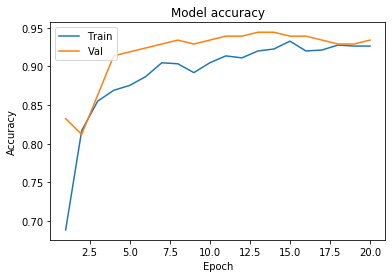

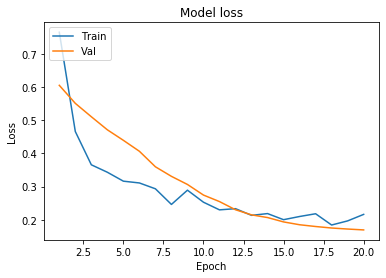

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_learningCurve(history, 20)

In [35]:
#adding max pool
#build cnn
model=Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(.2))
model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(.5))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1,activation='sigmoid'))


In [36]:
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=.0001),metrics=['accuracy'])

In [37]:
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Train on 787 samples, validate on 197 samples
Epoch 1/50
787/787 [==============================] - 3s 4ms/sample - loss: 1.2709 - accuracy: 0.5375 - val_loss: 0.6224 - val_accuracy: 0.7462
Epoch 2/50
787/787 [==============================] - 0s 601us/sample - loss: 0.9090 - accuracy: 0.6252 - val_loss: 0.5968 - val_accuracy: 0.7919
Epoch 3/50
787/787 [==============================] - 0s 624us/sample - loss: 0.7459 - accuracy: 0.6684 - val_loss: 0.5727 - val_accuracy: 0.7716
Epoch 4/50
787/787 [==============================] - 1s 699us/sample - loss: 0.5819 - accuracy: 0.7459 - val_loss: 0.5472 - val_accuracy: 0.7411
Epoch 5/50
787/787 [==============================] - 1s 653us/sample - loss: 0.5754 - accuracy: 0.7522 - val_loss: 0.5208 - val_accuracy: 0.7919
Epoch 6/50
787/787 [==============================] - 1s 646us/sample - loss: 0.4650 - accuracy: 0.7954 - val_loss: 0.4923 - val_accuracy: 0.7970
Epoch 7/50
787/787 [==============================] - 1s 831us/sample - loss: 0.

In [38]:
def plot_learningCurve(history, epochs):
    

    # Plot training & validation accuracy
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values\n",
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

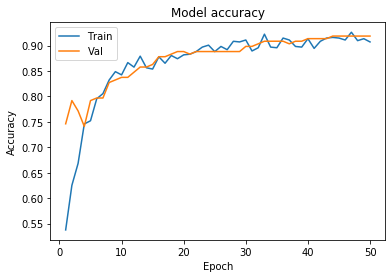

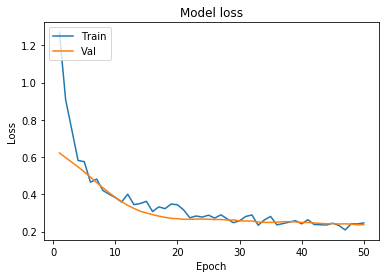

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_learningCurve(history, 50)